In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage import io

In [2]:
img = cv2.imread(r'Elaine.tiff',0)

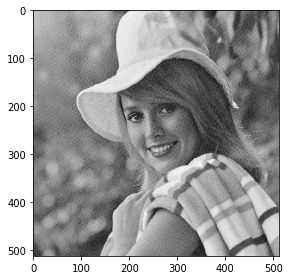

In [3]:
io.imshow(img,cmap='gray')

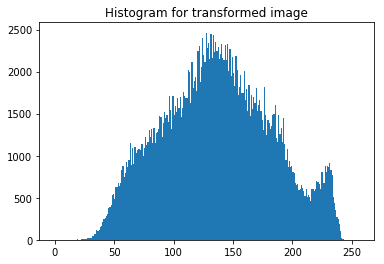

In [4]:
plt.hist(img.ravel(),256,[0,256])
plt.title('Histogram for transformed image')
plt.show()

In [5]:
img.shape

(512, 512)

In [6]:
shape = img.shape
hm = {}
for i in range(256):
    hm[i] = 0

In [7]:
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        hm[img[i][j]] = hm [img[i][j]] + 1

In [8]:
max = 0
for i in range(256):
    if(max < hm[i]):
        max = hm[i]

pif = {}
        
for i in range(256):
    pif[i] = (float)(hm[i])/max


In [9]:
pif.values()

dict_values([0.00040617384240454913, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00040617384240454913, 0.0, 0.0, 0.0016246953696181965, 0.00040617384240454913, 0.0012185215272136475, 0.002437043054427295, 0.002437043054427295, 0.0020308692120227455, 0.00487408610885459, 0.003249390739236393, 0.006904955320877335, 0.00934199837530463, 0.00934199837530463, 0.010560519902518278, 0.01949634443541836, 0.01949634443541836, 0.029650690495532088, 0.02924451665312754, 0.04955320877335499, 0.04467912266450041, 0.04955320877335499, 0.06255077173030058, 0.06661251015434606, 0.08651502843216897, 0.09991876523151909, 0.10601137286758733, 0.11454102355808286, 0.12510154346060115, 0.15475223395613322, 0.15840779853777417, 0.17018683996750608, 0.21527213647441104, 0.22014622258326563, 0.19496344435418358, 0.25345247766043866, 0.2546709991876523, 0.2757920389926889, 0.25995125913891143, 0.2745735174654752, 0.33753046303818035, 0.35621445978878963, 0.30381803411860275, 0.

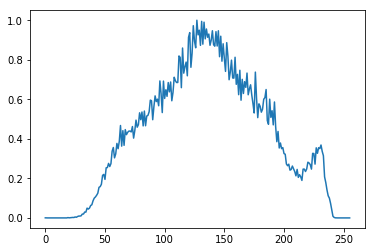

In [10]:
plt.plot(pif.keys(), pif.values())

In [11]:
cpif = {}

for i in range(256):
    cpif[i] = 0

for i in range(256):
    for j in range(i+1):
        cpif[i] = cpif[i] + pif[j]

In [12]:
cpif.values()

dict_values([0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.00040617384240454913, 0.0008123476848090983, 0.0008123476848090983, 0.0008123476848090983, 0.002437043054427295, 0.002843216896831844, 0.004061738424045492, 0.006498781478472787, 0.008935824532900082, 0.010966693744922828, 0.015840779853777416, 0.019090170593013808, 0.025995125913891144, 0.035337124289195776, 0.04467912266450041, 0.05523964256701869, 0.07473598700243705, 0.09423233143785542, 0.12388302193338752, 0.15312753858651507, 0.20268074735987007, 0.2473598700243705, 0.2969130787977255, 0.3594638505280261, 0.42607636068237215, 0.5125913891145412, 0.6125101543460603, 0.7185215272136476, 0.8330625507717304, 0.9581

In [13]:
normalised_cpif = {}

max = 0
for i in range(256):
    if(max < cpif[i]):
        max = cpif[i]

normalised_cpif = {}
        
for i in range(256):
    normalised_cpif[i] = (float)(cpif[i])/max

In [14]:
normalised_cpif.values()

dict_values([3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 3.814697265625001e-06, 7.629394531250002e-06, 7.629394531250002e-06, 7.629394531250002e-06, 2.2888183593750007e-05, 2.6702880859375007e-05, 3.8146972656250014e-05, 6.103515625000003e-05, 8.392333984375003e-05, 0.00010299682617187504, 0.00014877319335937505, 0.00017929077148437505, 0.00024414062500000005, 0.0003318786621093751, 0.00041961669921875016, 0.0005187988281250002, 0.0007019042968750003, 0.0008850097656250004, 0.0011634826660156257, 0.0014381408691406259, 0.001903533935546876, 0.0023231506347656263, 0.0027885437011718763, 0.003376007080078127, 0.004001617431640627, 0.004814147949218753, 0.0057525634765625035, 0.006748199462890

In [15]:
for i in range(256):
    normalised_cpif[i] = np.floor(normalised_cpif[i]*255)

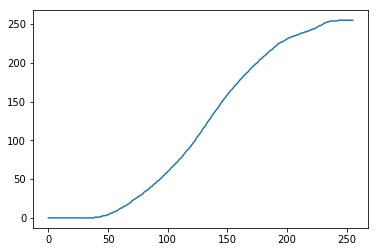

In [16]:
plt.plot(normalised_cpif.keys(), normalised_cpif.values())

In [17]:
transformed_img = np.zeros(img.shape)

In [18]:
for i in range(shape[0]):
    for j in range(shape[1]):
        transformed_img[i,j] =  normalised_cpif[img[i,j]]

In [19]:
transformed_img = transformed_img.astype(np.uint8)

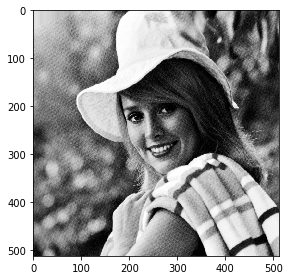

In [20]:
io.imshow(transformed_img, cmap='gray',vmin=0, vmax=255)

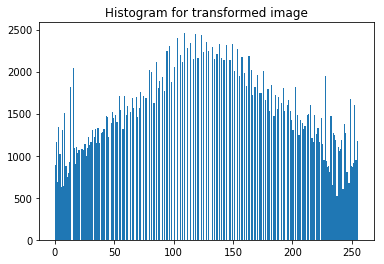

In [21]:
plt.hist(transformed_img.ravel(),256,[0,256])
plt.title('Histogram for transformed image')
plt.show()

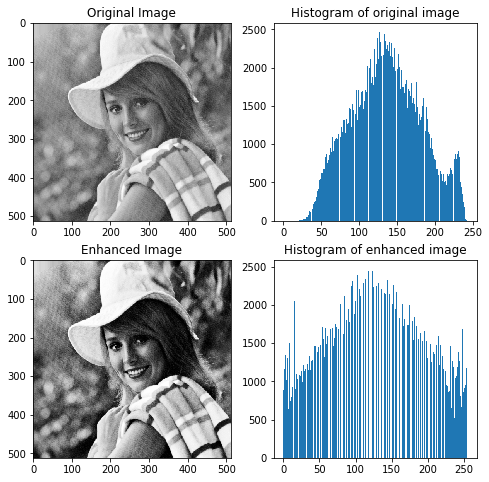

In [22]:
fig=plt.figure(figsize=(8,8))

ax1=fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
plt.title("Original Image")
ax2=fig.add_subplot(2,2,2)
ax2.hist(img.ravel(), bins=256)   
plt.title("Histogram of original image")    
ax3=fig.add_subplot(2,2,3)
ax3.imshow(transformed_img, cmap='gray')
plt.title("Enhanced Image")
ax4=fig.add_subplot(2,2,4)
ax4.hist(transformed_img.ravel(), bins=256)
plt.title("Histogram of enhanced image")
plt.show()